 # Categorical Assessment

Every year, real estate properties are assessed for their value. There are key attributes that are considered when evaluating a property, and these include the condition, total number of rooms, number of bedrooms, bathrooms, etc. Use a parallel categories plot to plot these attributes as dimensions. Use the interactive features of parallel category plots to review how each dimension can affect the other.

In [1]:
import pandas as pd
import plotly.express as px
from pathlib import Path

 ### Prep Data

In [6]:
# Read in data
prop_assessments = pd.read_csv((r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 6\2\06-Stu_Categorical_Evaluation\Resources\allegheny_property_assessments.csv"), 
index_col="LEGAL2", 
low_memory=False
).sample(50, replace=True)

prop_assessments.head()

,LEGAL1,LEGAL3,NEIGHCODE,TAXCODE,TAXDESC,OWNERDESC,CLASS,CLASSDESC,USECODE,USEDESC,...,CONDITION,CONDITIONDESC,TOTALROOMS,BEDROOMS,FULLBATHS,HALFBATHS,HEATINGCOOLING,HEATINGCOOLINGDESC,FIREPLACES,BSMTGARAGE
LEGAL2,,,,,,,,,,,,,,,,,,,,,
1 STY FRA HSE 231,MAYWOOD PLAN 91 LOT 27X100X22.58 RR HICKORY ST,NaN,91903,T,20 - Taxable,REGULAR-ETUX OR ET VIR,R,RESIDENTIAL,10,SINGLE FAMILY,...,4.0,FAIR,5.0,2.0,1.0,0.0,2,Central Heat,0.0,0.0
181.92 HARVEST LANE,HARVEST LANE CONDO IRREG LOT 201.77X460.65X,PT 2 STY BRK & ALUM BLDG - UNIT #7-B,61N10,T,20 - Taxable,REGULAR,R,RESIDENTIAL,50,CONDOMINIUM,...,3.0,AVERAGE,5.0,2.0,1.0,1.0,B,Central Heat with AC,0.0,1.0
L PARK AVE,CLAIRTON PLAN PTS 3806-3807 LOT 20.20X125 IN AL,2 STY FRA HSE 603,20003,T,20 - Taxable,REGULAR,R,RESIDENTIAL,10,SINGLE FAMILY,...,4.0,FAIR,4.0,2.0,1.0,0.0,2,Central Heat,0.0,0.0
PENN,BRADDOCK PK PLAN 286 LOT 25X100 MC KINLEY AV NR,NaN,87202,T,20 - Taxable,REGULAR,R,RESIDENTIAL,10,SINGLE FAMILY,...,4.0,FAIR,4.0,2.0,1.0,0.0,2,Central Heat,0.0,0.0
BATH HSE,CALAIS VILLAGE CONDO 18.882 A LD SLOOP RD 0.48%,TENNIS COURTS,61N38,T,20 - Taxable,REGULAR-ETUX OR ET VIR,R,RESIDENTIAL,50,CONDOMINIUM,...,2.0,GOOD,4.0,2.0,1.0,1.0,B,Central Heat with AC,0.0,0.0


In [8]:
prop_assessments.columns

Index(['LEGAL1', 'LEGAL3', 'NEIGHCODE', 'TAXCODE', 'TAXDESC', 'OWNERDESC',
       'CLASS', 'CLASSDESC', 'USECODE', 'USEDESC', 'LOTAREA', 'HOMESTEADFLAG',
       'FARMSTEADFLAG', 'CLEANGREEN', 'ABATEMENTFLAG', 'RECORDDATE',
       'SALEDATE', 'SALEPRICE', 'SALECODE', 'SALEDESC', 'DEEDBOOK', 'DEEDPAGE',
       'PREVSALEDATE', 'PREVSALEPRICE', 'PREVSALEDATE2', 'PREVSALEPRICE2',
       'CHANGENOTICEADDRESS1', 'CHANGENOTICEADDRESS2', 'CHANGENOTICEADDRESS3',
       'CHANGENOTICEADDRESS4', 'COUNTYBUILDING', 'COUNTYLAND', 'COUNTYTOTAL',
       'COUNTYEXEMPTBLDG', 'LOCALBUILDING', 'LOCALLAND', 'LOCALTOTAL',
       'FAIRMARKETBUILDING', 'FAIRMARKETLAND', 'FAIRMARKETTOTAL', 'STYLE',
       'STYLEDESC', 'STORIES', 'YEARBLT', 'EXTERIORFINISH', 'EXTFINISH_DESC',
       'ROOF', 'ROOFDESC', 'BASEMENT', 'BASEMENTDESC', 'GRADE', 'GRADEDESC',
       'CONDITION', 'CONDITIONDESC', 'TOTALROOMS', 'BEDROOMS', 'FULLBATHS',
       'HALFBATHS', 'HEATINGCOOLING', 'HEATINGCOOLINGDESC', 'FIREPLACES',
       'BSMTGA

 ### Slice Data

In [4]:
# Select list of columns
df_new = prop_assessments[["LOCALTOTAL", "USEDESC", "TOTALROOMS", "BEDROOMS", "FULLBATHS"]]
df_new.head()

,LOCALTOTAL,USEDESC,TOTALROOMS,BEDROOMS,FULLBATHS
LEGAL2,,,,,
RES DR,136100,SINGLE FAMILY,6.0,3.0,2.0
1 STY BRK VEN BUNG & INT GAR 3723,67000,SINGLE FAMILY,5.0,2.0,1.0
FAWCETT AVE,40000,SINGLE FAMILY,7.0,4.0,2.0
HERMAN ST,124600,SINGLE FAMILY,7.0,3.0,2.0
NaN,24100,SINGLE FAMILY,8.0,3.0,1.0


 ### Plot Data

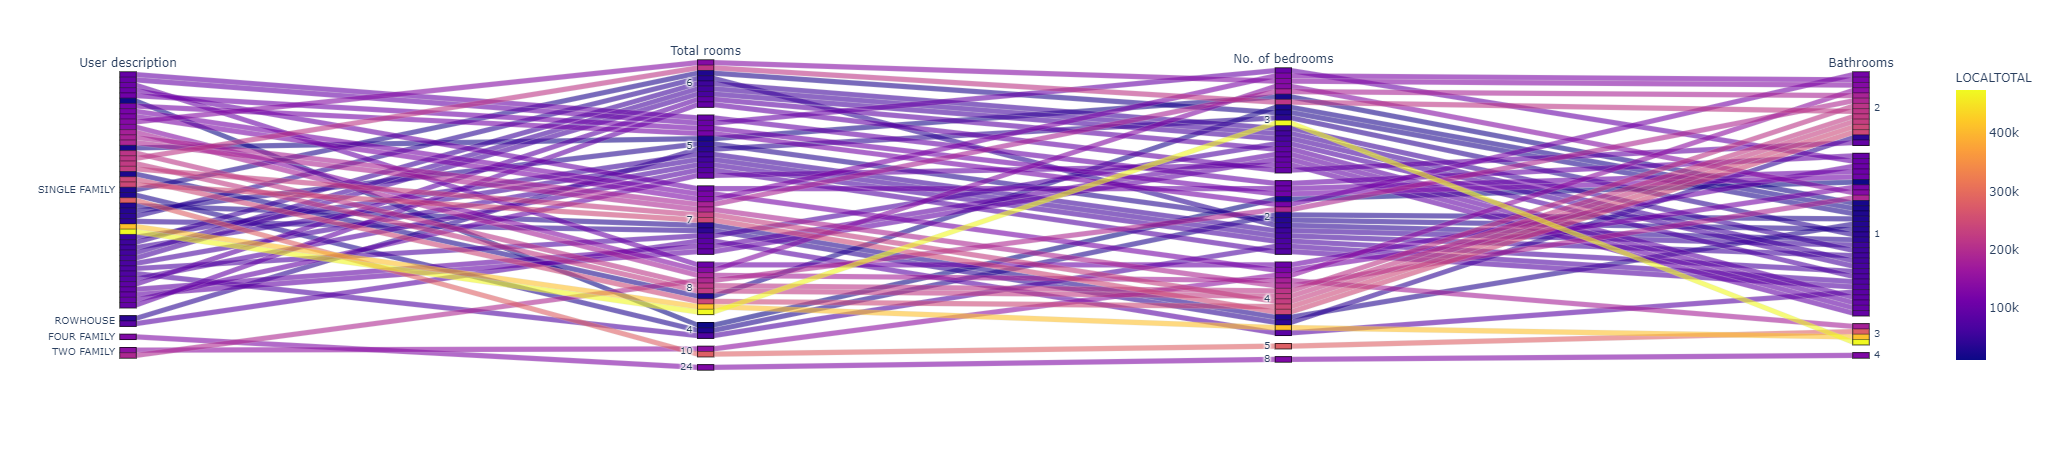

In [12]:
# Plot data
plot1 = px.parallel_categories(df_new,
                               dimensions=["USEDESC", "TOTALROOMS", "BEDROOMS", "FULLBATHS"],
                               color="LOCALTOTAL",
                               labels={"USEDESC": "User description",
                                       "TOTALROOMS": "Total rooms",
                                       "BEDROOMS": "No. of bedrooms",
                                       "FULLBATHS": "Bathrooms"})
plot1

Consider the questions below when thinking about the story.

* Are there any identifiable patterns at the dimension level? 
    * There are 45 Single Family homes in the area
    * Most Single Family Homes prefer 3 bed-rooms. More bedrooms are preferred for other types of families.
    * 1 Bathroom seems to fit the bill for most houses except those with families. 
* How many bedrooms and full bathrooms do single-family homes tend to have?
    * Ranges from 3 to 5 bedrooms
    * Ranges from 1 to 3 bathrooms
* How many full bathrooms are usually in a three-bedroom property?
    * 1